In [23]:
import pandas as pd
df=pd.read_csv('weight-height.csv')
# read the dataset
df.head()
# print the first 5 rows of the data set


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
print(df.tail())
# print the last 5 rows of the data set
df.shape
#to see details 


      Gender     Height      Weight
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103


(10000, 3)

In [25]:
# data type of each column
df.dtypes


Gender     object
Height    float64
Weight    float64
dtype: object

In [26]:

# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [27]:
# number of unique values of column Gender
df.Gender.nunique()

# unique values of column Gender
df.Gender.unique()
# array(['Male', 'Female'], dtype=object)

array(['Male', 'Female'], dtype=object)

As we can easily observe, the dataframe contains three columns: Gender, Height, and Weight. The Gender column contains two unique values of type object: male or female. A float data type is used in the columns Height and Weight. Since the dataframe does not contain null values and the data types are the expected ones, it is not necessary to clean the data .

# Distribution Plots/ Normal Distribution
<b> It is often called a "Bell Curve“ (klokvormig) because it looks like a bell.

We say the data is "normally distributed" <b>

To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms. Histograms are plots that show the distribution of a numeric variable, grouping data into bins. The height of the bar represents the number of observations per bin.


Text(0, 0.5, 'Frequency')

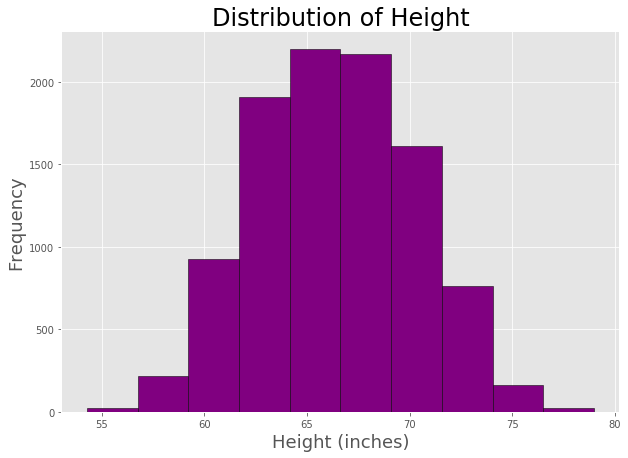

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7)) # histogram distribution graph
plt.title('Distribution of Height', size=24) # title
plt.xlabel('Height (inches)', size=18) # x axis
plt.ylabel('Frequency', size=18) # y asix



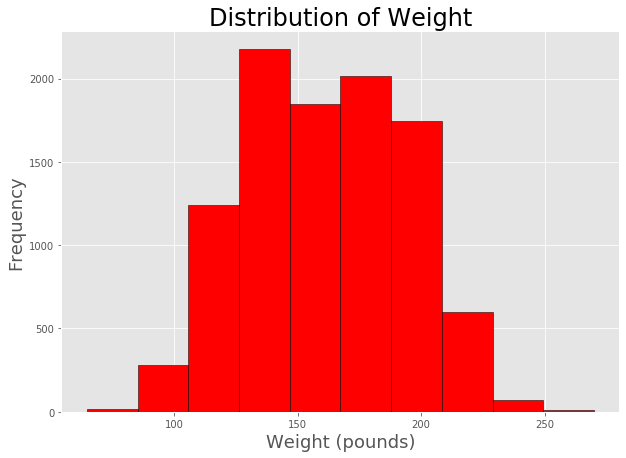

In [29]:
# histogram of the weight
# similar like above but for weight
df.Weight.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);


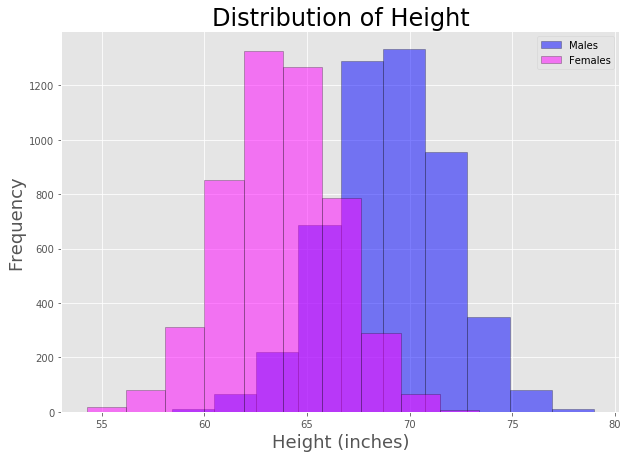

In [30]:
# histogram of the height - males and females
# showing distribution graph of both male and female according to height
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

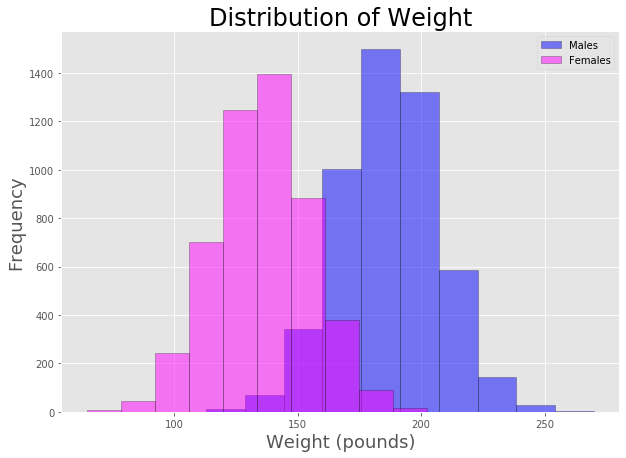

In [31]:
# histogram of the weight - males and females
# showing distribution graph of both male and female according to weight


df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

The previous plots depict that both variables Height and Weight present a normal distribution for males and females. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders

# Normal Curve

In [17]:
# imp libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


it will work similar like above one but also curve shows, incresing or decreasing numbers

C:\Users\Hamxa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


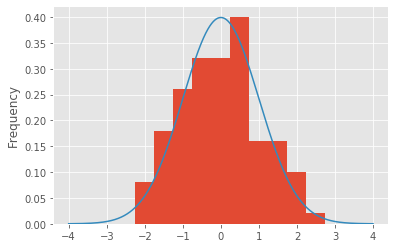

In [19]:
df = pd.DataFrame({'Height': np.random.normal(size=100)})

df.Height.plot(kind='hist', normed=True)

range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))

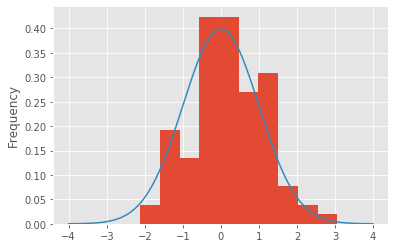

In [20]:
df = pd.DataFrame({'Weight': np.random.normal(size=100)})

df.Weight.plot(kind='hist', normed=True)

range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))

# Dist Plot

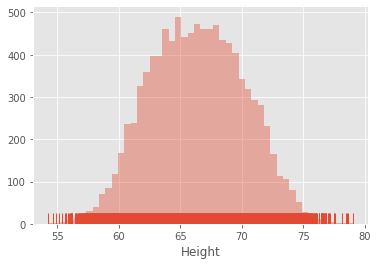

In [42]:
sns.distplot(df['Height'], kde=False, rug=True);
# to see how whole data of height is spreading

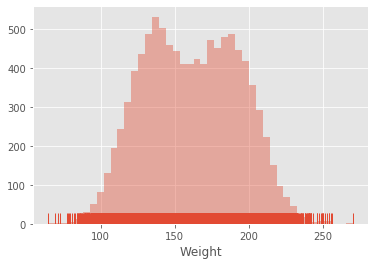

In [43]:
sns.distplot(df['Weight'], kde=False, rug=True);
# to see how whole data of Weight iss spreading

You can use it to determine the proportion of the values that fall within a specified number of standard deviations from the mean. For example, in a normal distribution, 68% of the observations fall within +/- 1 standard deviation from the mean

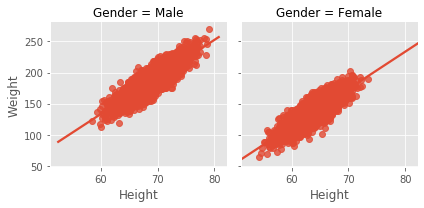

In [44]:
# for comparison of male and female 
# passing horizontal axis =height and vertical axis =weight
sns.lmplot(x="Height", y="Weight", col="Gender", data=df,
           col_wrap=2, height=3);

# Regplot

Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because regplot() is an “axes-level” function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.



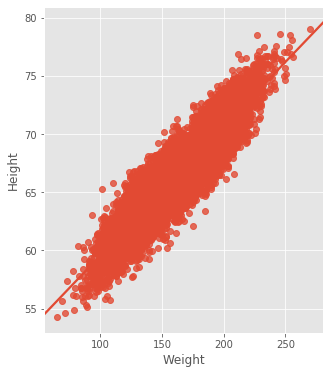

In [45]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="Weight", y="Height", data=df, ax=ax);


# Simple Linear Regression

Simple linear regression is a linear approach to modeling the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.
y =a+bx

The following plot shows the relation between height and weight for males and females. 


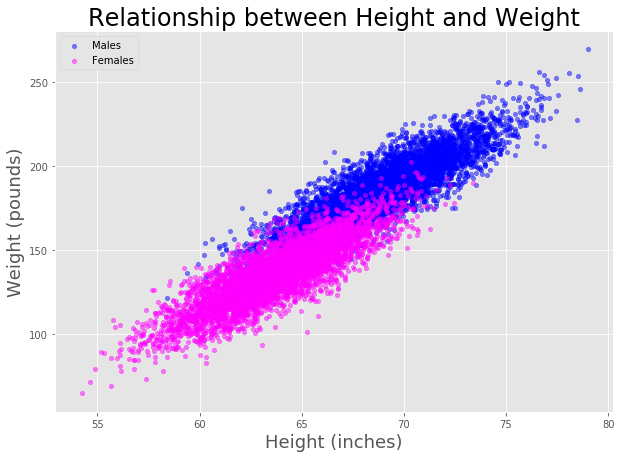

In [33]:
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In the following plot, we have randomly selected the height and weight of 500 women. This plot has not overplotting and we can better distinguish individual data points. As we can observe in previous plots, weight of males and females tents to go up as height goes up, showing in both cases a linear relation.

Text(0, 0.5, 'Weight (pounds)')

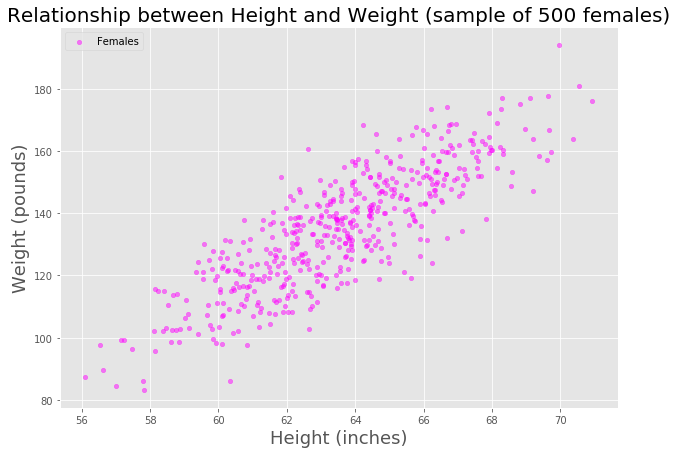

In [34]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

<b> Simple Linear Regression  </b>
where x is the independent variable (height), y is the dependent variable (weight), b is the slope, and a is the intercept. The intercept represents the value of y when x is 0 and the slope indicates the steepness of the line. The objective is to obtain the line that best fits our data (the line that minimize the sum of square errors). The error is the difference between the real value y and the predicted value y_hat, which is the value obtained using the calculated linear equation.
error = y(real)-y(predicted) = y(real)-(a+bx)

In [37]:
import numpy as np

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])

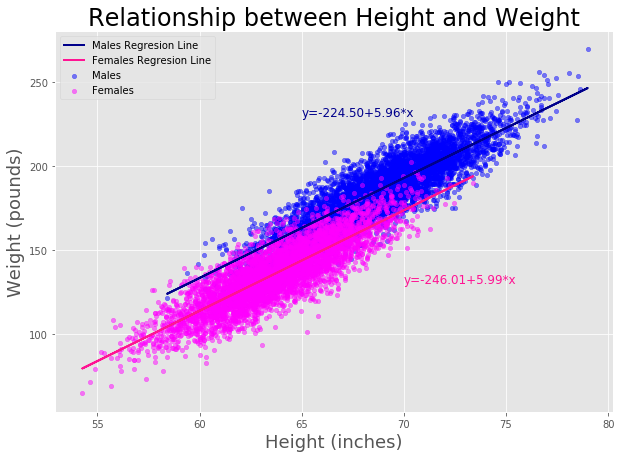

In [38]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

The following plot depicts the scatter plots as well as the previous regression lines.


For a better visualization, the following figure shows a regression plot of 300 randomly selected samples

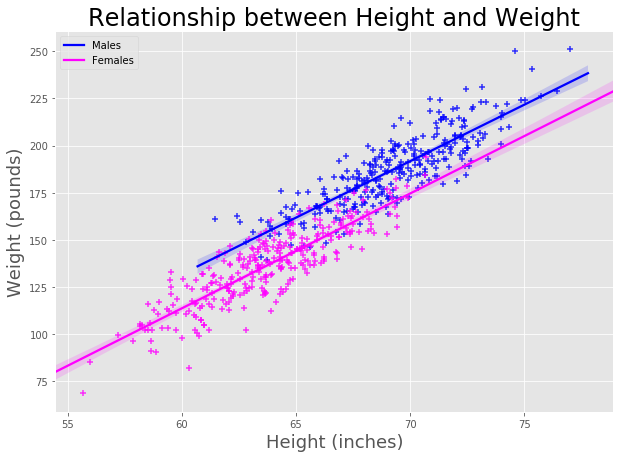

In [40]:

import seaborn as sns

# 300 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(300)
df_females_sample = df[df['Gender'] == 'Female'].sample(300)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);
